<a href="https://colab.research.google.com/github/hanucherukuri/Black_Friday_Sales_Prediction/blob/main/Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 To build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Data Acquisition

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data=pd.read_csv("/content/drive/MyDrive/Practice Problems/Black Friday Sales Prediction/train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Practice Problems/Black Friday Sales Prediction/test.csv")

In [ ]:
train_data.shape, test_data.shape

((550068, 12), (233599, 11))

In [ ]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
train_data["from"]="train_data"
test_data["from"]="test_data"

In [ ]:
df=pd.concat([train_data, test_data])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,from
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train_data
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train_data
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train_data
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train_data
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train_data


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,from
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test_data
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test_data
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test_data
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test_data
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN,test_data


In [ ]:
submission=pd.read_csv("/content/drive/MyDrive/Practice Problems/Black Friday Sales Prediction/sample_submission_V9Inaty.csv")
submission.head()

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


# Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  from                        783667 non-null  object 
dtypes: float64(3),

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
from                               0
dtype: int64

In [ ]:
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
from                              2
dtype: int64

In [ ]:
df.Gender.value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [ ]:
df.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [ ]:
round((df.Age.value_counts(normalize=True).mul(100)), 2).astype(str)+ "%"

26-35    39.94%
36-45     20.0%
18-25    18.11%
46-50     8.33%
51-55     6.99%
55+        3.9%
0-17      2.72%
Name: Age, dtype: object

In [ ]:
df.Occupation.value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

In [ ]:
df.City_Category.value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [ ]:
df.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df.Marital_Status.value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [ ]:
df.Product_Category_1.value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [ ]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [ ]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

# Data Wrangling

In [ ]:
df.Age=df.Age.replace("55+", "55")

In [ ]:
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.replace("4+","4")

In [ ]:
df.drop(["User_ID", "Product_ID", "Product_Category_3"], axis="columns", inplace=True)

In [ ]:
df.Product_Category_2.fillna(df.Product_Category_2.median(), inplace=True)

In [ ]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
from                               0
dtype: int64

# Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

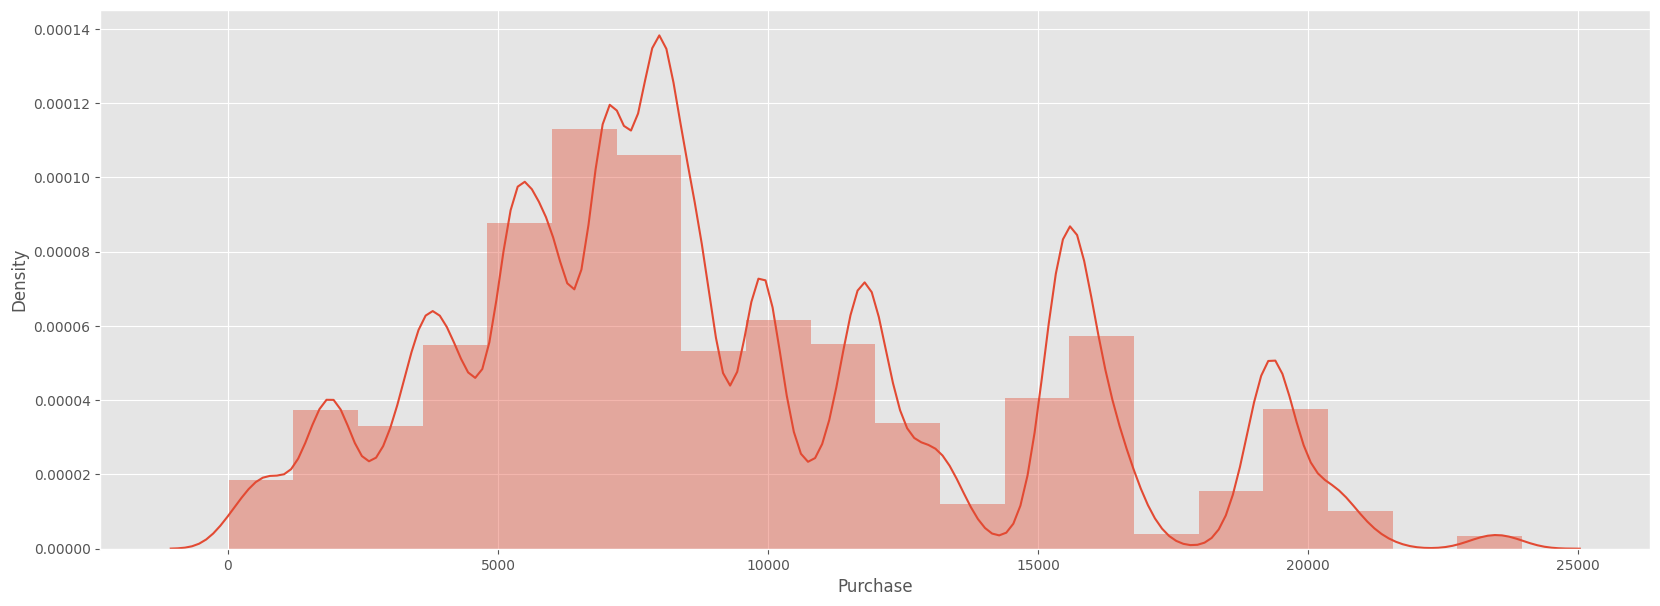

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(df.Purchase, bins = 20)
plt.show()

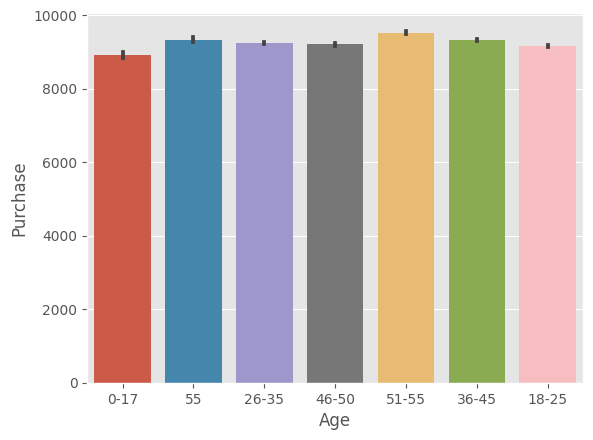

In [ ]:
sns.barplot(x="Age", y="Purchase", data=df)

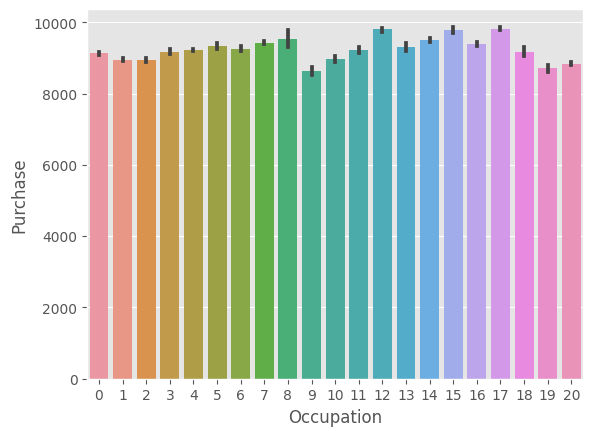

In [ ]:
sns.barplot(x="Occupation", y="Purchase", data=df)

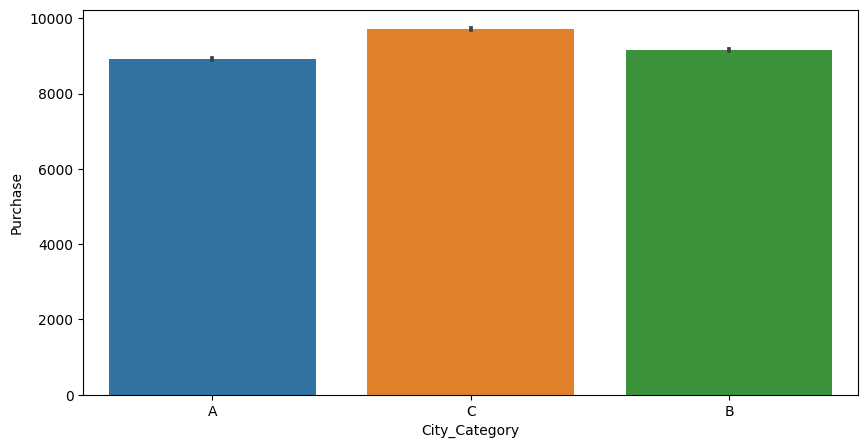

In [ ]:
plt.style.use('default')
plt.figure(figsize = (10, 5))
sns.barplot(x="City_Category", y="Purchase", data=df)

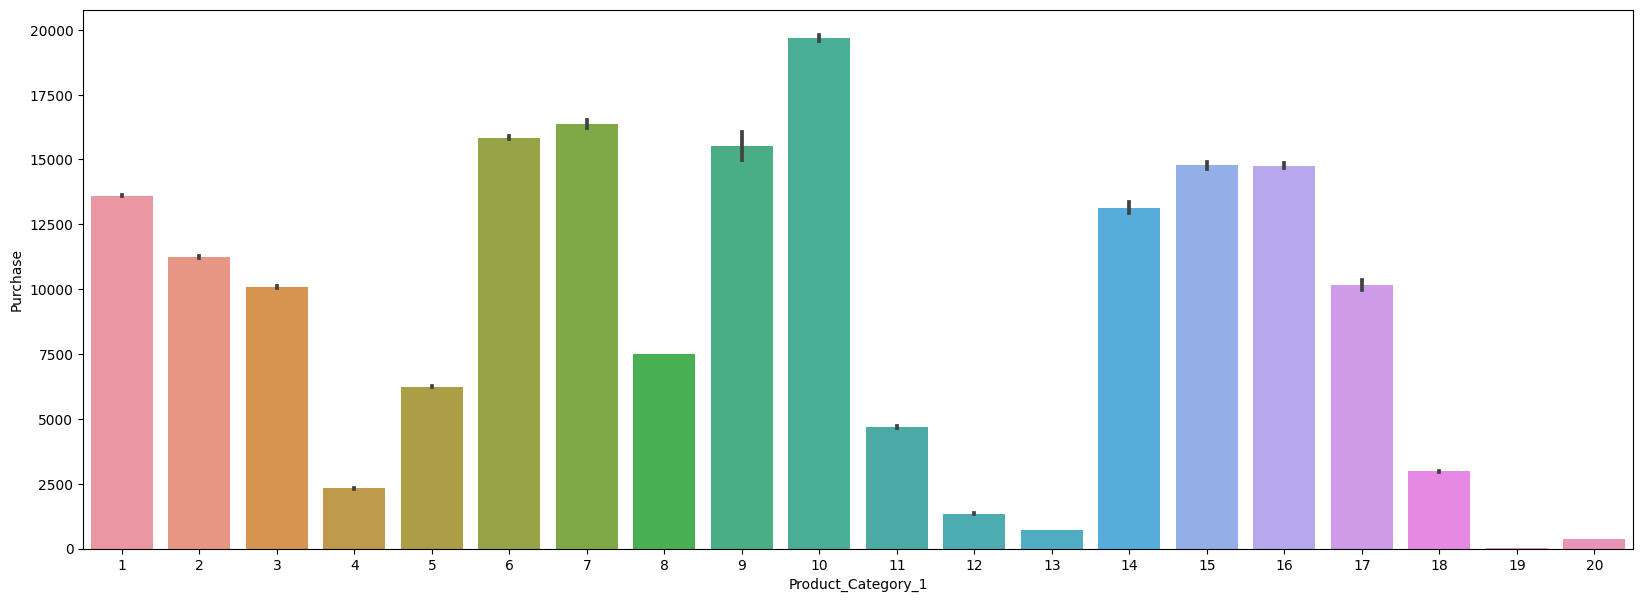

In [ ]:
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(x="Product_Category_1", y="Purchase", data=df)

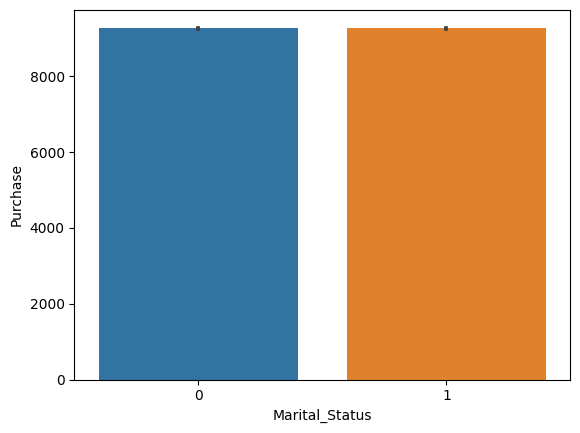

In [ ]:

sns.barplot(x="Marital_Status", y="Purchase", data=df)

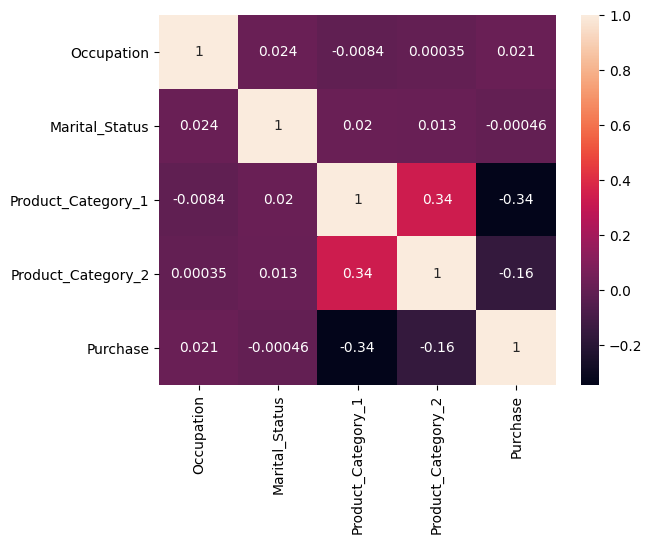

In [ ]:
sns.heatmap(df.corr(), annot = True)


In [ ]:
#sns.regplot(df.Purchase, df.Product_Category_1)

In [ ]:
#sns.regplot(df.Purchase, df.Product_Category_2)

In [ ]:
#sns.regplot(df.Product_Category_1, df.Product_Category_2)

# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Age"]=le.fit_transform(df["Age"])
df["City_Category"]=le.fit_transform(df["City_Category"])

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,from
0,0,0,10,0,2,0,3,9.0,8370.0,train_data
1,0,0,10,0,2,0,1,6.0,15200.0,train_data
2,0,0,10,0,2,0,12,9.0,1422.0,train_data
3,0,0,10,0,2,0,12,14.0,1057.0,train_data
4,1,6,16,2,4,0,8,9.0,7969.0,train_data


In [ ]:
df.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
from                           object
dtype: object

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int')

In [ ]:
train=df.loc[df["from"]=="train_data"]
test=df.loc[df["from"]=="test_data"]

In [ ]:
train.shape, test.shape

((550068, 10), (233599, 10))

In [ ]:
train.drop('from', axis = 1, inplace = True)


In [ ]:
test.drop(["from", "Purchase"], axis = 1, inplace = True)

In [ ]:
train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0,10,0,2,0,3,9.0,8370.0
1,0,0,10,0,2,0,1,6.0,15200.0
2,0,0,10,0,2,0,12,9.0,1422.0
3,0,0,10,0,2,0,12,14.0,1057.0
4,1,6,16,2,4,0,8,9.0,7969.0


In [ ]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1,4,7,1,2,1,1,11.0
1,1,2,17,2,0,0,3,5.0
2,0,3,1,1,4,1,5,14.0
3,0,3,1,1,4,1,4,9.0
4,0,2,1,2,1,0,4,5.0


In [ ]:
X=train.drop("Purchase", axis=1)

In [ ]:
y=train.Purchase

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (440054, 8)
X_test shape: (110014, 8)
Y_train shape: (440054,)
Y_test shape: (110014,)


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
model=regressor.fit(X_train, Y_train)

In [ ]:
yhat=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse=sqrt(mean_squared_error(Y_test, yhat))
rmse

3157.8451141588744

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0)


In [ ]:
model1=regr.fit(X_train, Y_train)

In [ ]:
yhat1=model1.predict(X_test)

In [ ]:
rmse=sqrt(mean_squared_error(Y_test, yhat1))
rmse

4163.747031944405

# LinearRegression

In [ ]:
 from sklearn.linear_model import LinearRegression
 model2 = LinearRegression().fit(X_train, Y_train)

In [ ]:
yhat2=model2.predict(X_test)

In [ ]:
rmse=sqrt(mean_squared_error(Y_test, yhat2))
rmse

4686.659858408443

# ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model3 = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, Y_train)

In [ ]:
yhat3=model3.predict(X_test)

In [ ]:
rmse=sqrt(mean_squared_error(Y_test, yhat3))
rmse

3094.8825311239457

In [ ]:
result=model3.predict(test)

In [ ]:
output=pd.DataFrame({"User_ID":test_data["User_ID"], "Product_ID":test_data["Product_ID"], "Purchase":result}, columns=["User_ID", "Product_ID", "Purchase"])

In [ ]:
output.to_csv("Output.csv", index=False)

# XGB Regressor

In [ ]:
import xgboost as xg 
xgb_r = xg.XGBRegressor()

In [ ]:
xgb_model=xgb_r.fit(X_train, Y_train)

[14:00:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred = xgb_model.predict(X_test)

In [ ]:
rmse=sqrt(mean_squared_error(Y_test, pred))
rmse

3013.596472814199

# Multi-layer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
MLPregr = MLPRegressor().fit(X_train, Y_train) 

In [ ]:
y_pred=MLPregr.predict(X_test)

In [ ]:
rmse=sqrt(mean_squared_error(Y_test, y_pred))
rmse